In [1]:
import pandas as pd
train_data_2m = pd.read_csv('./Patent2M/train.csv')
test_data_2m = pd.read_csv('./Patent2M/test.csv')
train_data_14k = pd.read_csv('./Patent14K/train.csv')
test_data_14k = pd.read_csv('./Patent14K/test.csv')
train_data_2m.shape, test_data_2m.shape, train_data_14k.shape, test_data_14k.shape

((2059636, 2), (20000, 2), (14000, 4), (4000, 4))

In [4]:
labels = dict()
for cpcs in train_data_2m['cpc_ids']:
    for cpc in cpcs.strip().split(','):
        if cpc in labels:
            labels[cpc] += 1
        else:
            labels[cpc] = 1
# {'B64C': 8574,
#  'Y02T': 43498,
#  'F21S': 7769,
#  'F21V': 14559,...}

mini_labels = dict()
for cpcs in train_data_14k['cpc_ids']:
    for cpc in cpcs.strip().split(','):
        if cpc in mini_labels:
            mini_labels[cpc] += 1
        else:
            mini_labels[cpc] = 1
# {'B64C': 53,
#  'Y02T': 300,
#  'F21S': 47,
#  'F21V': 96,...}

In [5]:
sorted_label = sorted(labels.items(),key=lambda x:x[1],reverse=True)
sorted_mini_label = sorted(mini_labels.items(),key=lambda x:x[1],reverse=True)

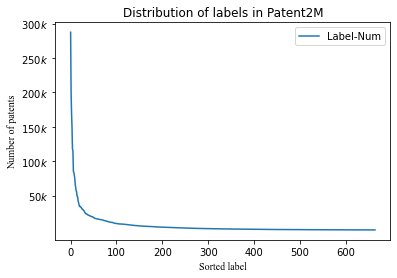

In [6]:
import matplotlib.pyplot as plt
import numpy as np
sorted_label_values = [v[1] for v in sorted_label]
ypoints = np.array(sorted_label_values)
xpoints = np.array(range(665))
plt.title('Distribution of labels in Patent2M') 
plt.yticks([50000,100000, 150000, 200000, 250000,300000],
          [r'$50k$', r'$100k$', r'$150k$', r'$200k$', r'$250k$',r'$300k$'])
plt.xlabel('Sorted label', fontdict={"family": "Times New Roman"})
plt.ylabel('Number of patents', fontdict={"family": "Times New Roman"})

plt.plot(xpoints, ypoints,label='Label-Num')
plt.legend()
# plt.savefig('./Graph/labels.jpg')
plt.show()

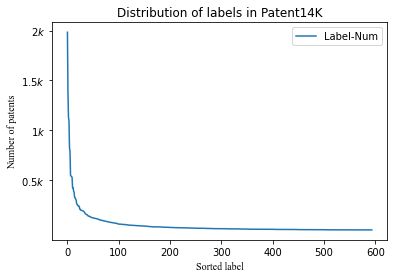

In [7]:
import matplotlib.pyplot as plt
import numpy as np
sorted_mini_label_values = [v[1] for v in sorted_mini_label]
ypoints = np.array(sorted_mini_label_values)
xpoints = np.array(range(594))
plt.title('Distribution of labels in Patent14K') 
plt.yticks([500,1000, 1500, 2000,2500, 3000,3500],
          [r'$0.5k$',r'$1k$', r'$1.5k$', r'$2k$', r'$2.5k$', r'$3k$',r'$3.5k$'])
plt.xlabel('Sorted label', fontdict={"family": "Times New Roman"})
plt.ylabel('Number of patents', fontdict={"family": "Times New Roman"})
plt.plot(xpoints, ypoints,label='Label-Num')
plt.legend()
# plt.savefig('./Graph/mini_labels.jpg')
plt.show()